#Data

In [1]:
import gdown
#2019
google_drive_url_test = "https://drive.google.com/uc?id=1UdF7pDcDeJeqGpbnKo2CoG9yRFL9sXv3"

# Đường dẫn đến nơi lưu trữ file trên Kaggle
output_path_test = "data_test.csv"

# Tải file từ Google Drive
gdown.download(google_drive_url_test, output_path_test, quiet=False)

#Predict GWR
google_drive_url_gwr = "https://drive.google.com/uc?id=1MlAzRqtOAtctSkCbqy-Zi3-rIF-fAtEe"

# Đường dẫn đến nơi lưu trữ file trên Kaggle
output_path_gwr = "predict_gwr.csv"

# Tải file từ Google Drive
gdown.download(google_drive_url_gwr, output_path_gwr, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1UdF7pDcDeJeqGpbnKo2CoG9yRFL9sXv3
To: /content/data_test.csv
100%|██████████| 3.28M/3.28M [00:00<00:00, 27.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MlAzRqtOAtctSkCbqy-Zi3-rIF-fAtEe
To: /content/predict_gwr.csv
100%|██████████| 1.01M/1.01M [00:00<00:00, 11.3MB/s]


'predict_gwr.csv'

In [2]:
#Predict step
google_drive_url_step = "https://drive.google.com/uc?id=12QMkbTe6-mheqOmlDNCU0c8kx2qaQ_Dt"
# Đường dẫn đến nơi lưu trữ file
output_path_step = "predict_step.csv"

# Tải file từ Google Drive
gdown.download(google_drive_url_step, output_path_step, quiet=False)

#Predict random forest
google_drive_url_rf = "https://drive.google.com/uc?id=1HDrp-Cg0QxEJKIosJZBU7e2CX47nljRD"

# Đường dẫn đến nơi lưu trữ file
output_path_rf = "predict_rf.csv"

# Tải file từ Google Drive
gdown.download(google_drive_url_rf, output_path_rf, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=12QMkbTe6-mheqOmlDNCU0c8kx2qaQ_Dt
To: /content/predict_step.csv
100%|██████████| 813k/813k [00:00<00:00, 9.68MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HDrp-Cg0QxEJKIosJZBU7e2CX47nljRD
To: /content/predict_rf.csv
100%|██████████| 1.18M/1.18M [00:00<00:00, 13.5MB/s]


'predict_rf.csv'

##Dataframe for actual and predict results

In [54]:
import pandas as pd

# Đọc tệp CSV và tạo DataFrame
df_gwr = pd.read_csv(output_path_gwr)

df_gwr['GWR'] = df_gwr['GWR'].apply(lambda x: 0 if x < 0 else x)


df_gwr = df_gwr['GWR']

# Hiển thị df_gwr
print(df_gwr)


0        1.603473
1        0.000000
2        0.000000
3        0.039026
4        0.000000
           ...   
39995    1.378766
39996    3.279509
39997    3.266569
39998    0.599934
39999    0.000000
Name: GWR, Length: 40000, dtype: float64


In [55]:
import pandas as pd

# Đọc tệp CSV và tạo DataFrame
df_step = pd.read_csv(output_path_step)

df_step = df_step.rename(columns={'y_pred': 'STEP'})


# Hiển thị df_gwr
print(df_step)

           STEP
0      1.904419
1     -0.271116
2     -0.262341
3     -0.050783
4      0.238996
...         ...
39995  1.473952
39996  2.758788
39997  2.336991
39998  4.274359
39999  0.738242

[40000 rows x 1 columns]


In [56]:
import pandas as pd

# Đọc tệp CSV và tạo DataFrame
df_rf = pd.read_csv(output_path_rf)

df_rf = df_rf.rename(columns={'Predicted': 'RF'})
df_rf = df_rf['RF']

# Hiển thị df_gwr
print(df_rf)

0        0.066000
1        0.884467
2        0.050500
3        0.004000
4        0.607000
           ...   
39995    0.131167
39996    0.006000
39997    0.857800
39998    0.039000
39999    4.174750
Name: RF, Length: 40000, dtype: float64


In [57]:
import pandas as pd

# Đọc tệp CSV và tạo DataFrame
df_test = pd.read_csv(output_path_test)

# Tạo DataFrame mới chỉ gồm các cột mong muốn
columns_to_keep = ['name', 'Row Position', 'Column Position', 'AWS', 'Imerg', 'DEM']
df_new = df_test[columns_to_keep]

df_new = df_new.rename(columns={'Row Position': 'Row'})
df_new = df_new.rename(columns={'Column Position': 'Column'})

# Hiển thị DataFrame mới
print(df_new)

                 name  Row  Column  AWS     Imerg  DEM
0      20190401000000   16     109  0.8  0.000000  350
1      20190401000000   83      69  0.0  0.000000  162
2      20190401000000   82      18  0.0  0.000000  260
3      20190401000000    7     173  0.0  0.000000    0
4      20190401000000   77     235  0.0  0.000000    0
...               ...  ...     ...  ...       ...  ...
39995  20191031230000   20     103  0.2  0.000000  357
39996  20191031230000   20     135  1.9  3.327910    9
39997  20191031230000   21     129  0.2  2.202812    9
39998  20191031230000   67     121  1.6  3.217461  258
39999  20191031230000   82      59  0.0  0.208975  164

[40000 rows x 6 columns]


In [58]:
# Ghép các DataFrame lại với nhau theo chiều ngang
df_combined = pd.concat([df_new, df_step, df_gwr, df_rf], axis=1)

# Hiển thị DataFrame đã ghép
print(df_combined)

                 name  Row  Column  AWS     Imerg  DEM      STEP       GWR  \
0      20190401000000   16     109  0.8  0.000000  350  1.904419  1.603473   
1      20190401000000   83      69  0.0  0.000000  162 -0.271116  0.000000   
2      20190401000000   82      18  0.0  0.000000  260 -0.262341  0.000000   
3      20190401000000    7     173  0.0  0.000000    0 -0.050783  0.039026   
4      20190401000000   77     235  0.0  0.000000    0  0.238996  0.000000   
...               ...  ...     ...  ...       ...  ...       ...       ...   
39995  20191031230000   20     103  0.2  0.000000  357  1.473952  1.378766   
39996  20191031230000   20     135  1.9  3.327910    9  2.758788  3.279509   
39997  20191031230000   21     129  0.2  2.202812    9  2.336991  3.266569   
39998  20191031230000   67     121  1.6  3.217461  258  4.274359  0.599934   
39999  20191031230000   82      59  0.0  0.208975  164  0.738242  0.000000   

             RF  
0      0.066000  
1      0.884467  
2      0.

#Validation

In [59]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

def relative_bias(y_true, y_pred):
    return np.sum(y_pred - y_true) / np.sum(y_true) * 100

def correlation_coefficient(y_true, y_pred):
    return np.corrcoef(y_true.flatten(), y_pred.flatten())[0][1]

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def nse(y_true, y_pred):
    return 1 - (np.sum((y_pred - y_true) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

In [60]:
obs = df_combined['AWS'].values.reshape((-1,1))
imerg = df_combined['Imerg'].values.reshape((-1,1))
step = df_combined['STEP'].values.reshape((-1,1))
gwr = df_combined['GWR'].values.reshape((-1,1))
rf = df_combined['RF'].values.reshape((-1,1))


In [61]:
# Calculate metrics for imerg
rb_imerg = relative_bias(obs, imerg)
cc_imerg = correlation_coefficient(obs, imerg)
rmse_imerg = rmse(obs, imerg)
nse_imerg = nse(obs, imerg)

In [62]:
# Calculate metrics for STEP method
rb_step = relative_bias(obs, step)
cc_step = correlation_coefficient(obs, step)
rmse_step = rmse(obs, step)
nse_step = nse(obs, step)

In [63]:
# Calculate metrics for GWR method
rb_gwr = relative_bias(obs, gwr)
cc_gwr = correlation_coefficient(obs, gwr)
rmse_gwr = rmse(obs, gwr)
nse_gwr = nse(obs, gwr)

In [64]:
# Calculate metrics for FR method
rb_rf = relative_bias(obs, rf)
cc_rf = correlation_coefficient(obs, rf)
rmse_rf = rmse(obs, rf)
nse_rf = nse(obs, rf)

#Evaludation

##Overall Evaluation

###Bảng giá trị

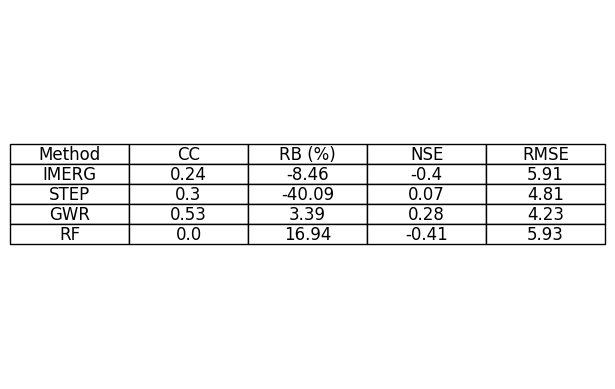

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Dữ liệu kết quả
results = pd.DataFrame({
    'Method': ['IMERG', 'STEP', 'GWR', 'RF'],
    'CC': [cc_imerg, cc_step, cc_gwr, cc_rf ],
    'RB (%)': [rb_imerg, rb_step, rb_gwr, rb_rf],
    'NSE': [nse_imerg, nse_step, nse_gwr, nse_rf],
    'RMSE': [rmse_imerg, rmse_step, rmse_gwr, rmse_rf ]
})

# Làm tròn các giá trị đến 2 chữ số thập phân
results[['RB (%)', 'CC', 'RMSE', 'NSE']] = results[['RB (%)', 'CC', 'RMSE', 'NSE']].round(2)

# Tạo bảng
fig, ax = plt.subplots()

# Ẩn trục
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Tạo bảng từ DataFrame đã làm tròn
table = ax.table(cellText=results.values, colLabels=results.columns, cellLoc='center', loc='center')

# Định dạng bảng
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Điều chỉnh kích thước bảng

# Hiển thị bảng
plt.show()

###Biểu đồ phân tán

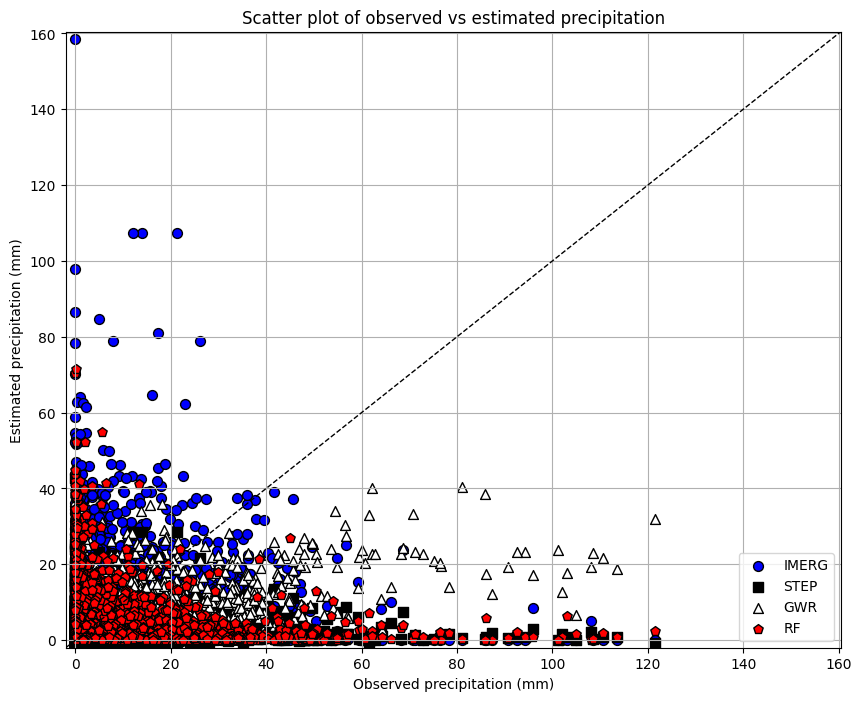

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate scatter plot
def plot_scatter(observed, predicted_dict, methods):
    plt.figure(figsize=(10, 8))

    # Loop through each method and plot
    markers = ['o', 's', '^', 'p']
    colors = ['blue', 'black', 'white','red']
    for i, method in enumerate(methods):
        plt.scatter(observed, predicted_dict[method], label=method,
                    edgecolors='k', facecolors=colors[i], marker=markers[i], s=50)

    # Plot 1:1 line
    max_val = max(observed.max(), max([pred.max() for pred in predicted_dict.values()])) + 2
    min_val = -2
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1)

    # Add labels and title
    plt.xlabel('Observed precipitation (mm)')
    plt.ylabel('Estimated precipitation (mm)')
    plt.title('Scatter plot of observed vs estimated precipitation')
    plt.legend()
    plt.grid(True)
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)

    plt.show()

# Dictionary of predicted values
predicted_dict = {
    'IMERG': imerg,
    'STEP': step,
    'GWR': gwr,
    'RF': rf
}

# List of methods
methods = ['IMERG', 'STEP', 'GWR', 'RF']

# Call the function to plot scatter
plot_scatter(obs, predicted_dict, methods)

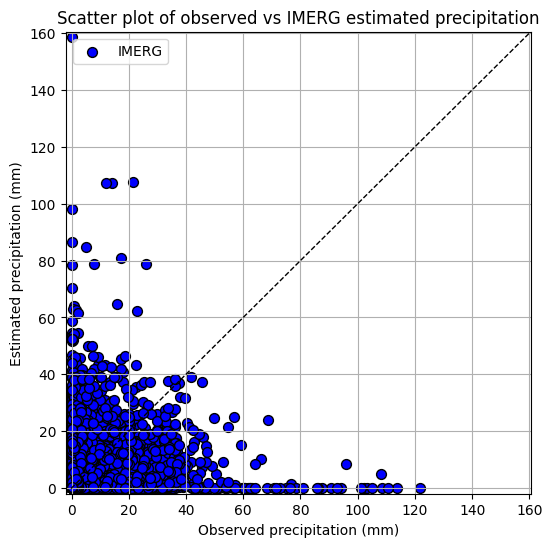

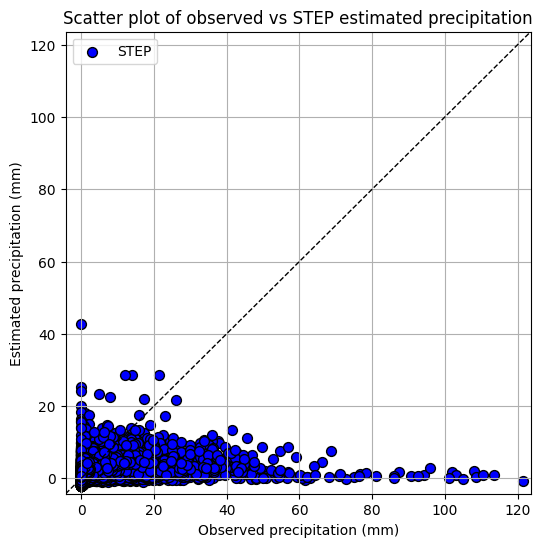

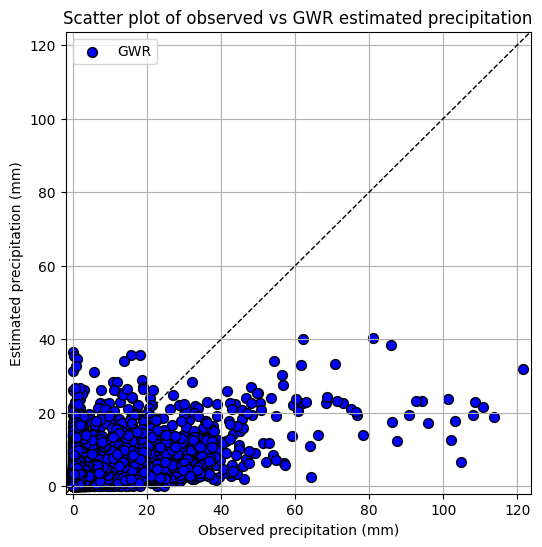

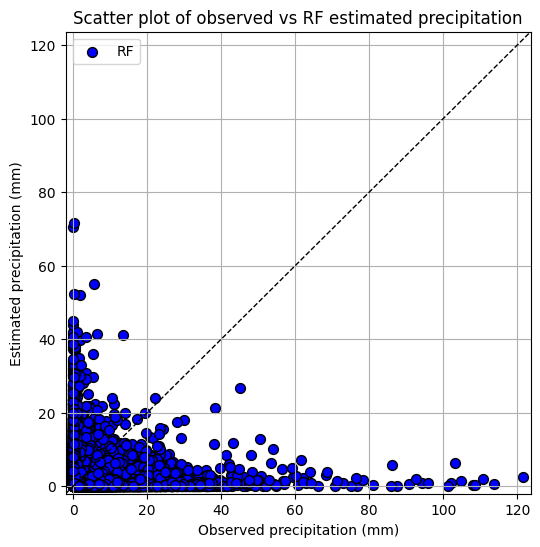

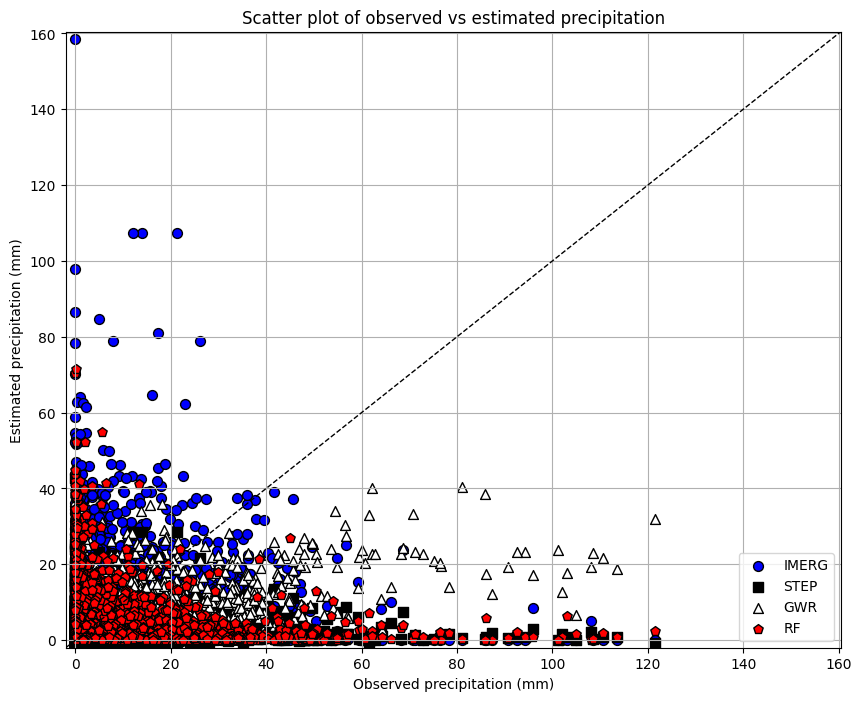

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to generate scatter plot
def plot_scatter(observed, predicted_dict, methods):
    plt.figure(figsize=(10, 8))

    # Loop through each method and plot
    markers = ['o', 's', '^', 'p']
    colors = ['blue', 'black', 'white', 'red']
    for i, method in enumerate(methods):
        plt.scatter(observed, predicted_dict[method], label=method,
                    edgecolors='k', facecolors=colors[i], marker=markers[i], s=50)

    # Plot 1:1 line
    max_val = max(observed.max(), max([pred.max() for pred in predicted_dict.values()])) + 2
    min_val = -2
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1)

    # Add labels and title
    plt.xlabel('Observed precipitation (mm)')
    plt.ylabel('Estimated precipitation (mm)')
    plt.title('Scatter plot of observed vs estimated precipitation')
    plt.legend()
    plt.grid(True)
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)

    plt.show()

# Function to evaluate and plot comparison
def evaluate_methods(observed, predicted_dict, methods):
    results = {}

    for method in methods:
        predicted = predicted_dict[method]

        # Plot scatter plot for this method
        plt.figure(figsize=(6, 6))
        plt.scatter(observed, predicted, label=method, edgecolors='k', facecolors='blue', marker='o', s=50)
        max_val = max(observed.max(), predicted.max()) + 2
        min_val = min(observed.min(), predicted.min()) - 2
        plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1)
        plt.xlabel('Observed precipitation (mm)')
        plt.ylabel('Estimated precipitation (mm)')
        plt.title(f'Scatter plot of observed vs {method} estimated precipitation')
        plt.legend()
        plt.grid(True)
        plt.xlim(min_val, max_val)
        plt.ylim(min_val, max_val)
        plt.show()

    return results

# Dictionary of predicted values (replace with your actual data)
predicted_dict = {
    'IMERG': imerg,
    'STEP': step,
    'GWR': gwr,
    'RF': rf
}

# List of methods
methods = ['IMERG', 'STEP', 'GWR', 'RF']

# Evaluate methods
results = evaluate_methods(obs, predicted_dict, methods)

# Plot all scatter plots together
plot_scatter(obs, predicted_dict, methods)


###Biểu đồ boxplot

In [68]:
df = df_combined.copy()
# Chuyển đổi cột 'name' thành định dạng ngày
df['name'] = pd.to_datetime(df['name'], format='%Y%m%d%H%M%S')

# Tạo một cột chỉ chứa ngày
df['date'] = df['name'].dt.date

# Hàm tính toán hệ số tương quan Pearson
def calculate_cc(group):
    return {
        'IMERG-CC': group['Imerg'].corr(group['AWS']),
        'STEP-CC': group['STEP'].corr(group['AWS']),
        'GWR-CC': group['GWR'].corr(group['AWS']),
        'RF-CC': group['RF'].corr(group['AWS'])
    }

# Áp dụng hàm tính toán hệ số tương quan cho từng nhóm ngày
correlation_df = df.groupby('date').apply(calculate_cc).reset_index()

# Mở rộng dictionary thành các cột riêng biệt
correlation_df = pd.json_normalize(correlation_df.to_dict(orient='records'))

# Đổi tên cột 'date' thành 'name' để phù hợp với yêu cầu và loại bỏ tiền tố '0.'
correlation_df.columns = correlation_df.columns.str.replace('0.', '')

print(correlation_df)

          date  IMERG-CC   STEP-CC    GWR-CC     RF-CC
0   2019-04-01  0.216435  0.264433  0.585433 -0.029303
1   2019-04-02 -0.016062  0.050863  0.786601  0.035463
2   2019-04-03  0.160946  0.169131  0.637851  0.021581
3   2019-04-04  0.296401  0.360760  0.578345  0.014745
4   2019-04-05  0.233115  0.180210  0.320232  0.017136
..         ...       ...       ...       ...       ...
56  2019-10-27  0.375324  0.384640  0.431109  0.055929
57  2019-10-28  0.097888  0.258440  0.294468 -0.000248
58  2019-10-29 -0.031697  0.223950  0.433985  0.003473
59  2019-10-30 -0.058742  0.198302  0.579317 -0.038582
60  2019-10-31  0.177796  0.326741  0.555579  0.048518

[61 rows x 5 columns]


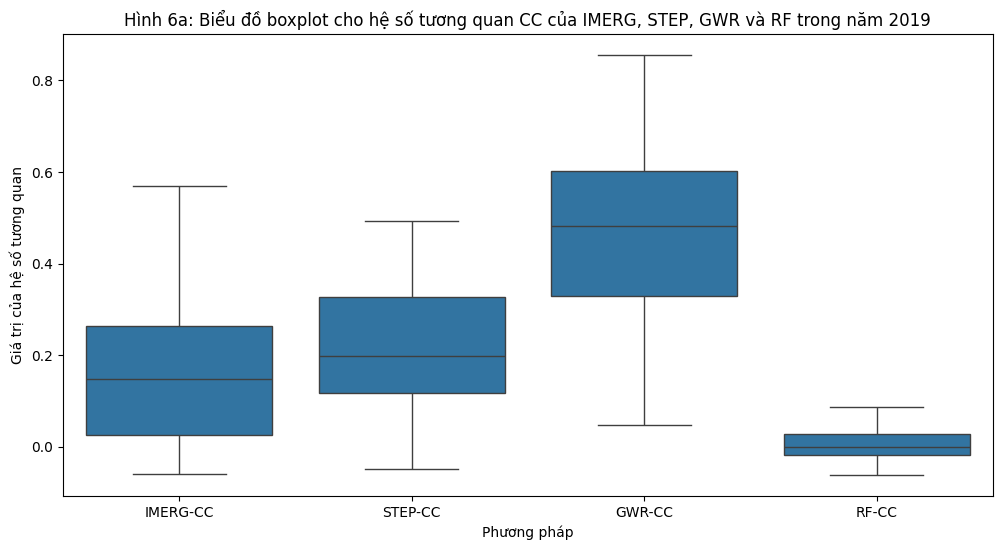

In [69]:
import seaborn as sns
correlation_df_long = pd.melt(correlation_df, id_vars=['date'], value_vars=['IMERG-CC', 'STEP-CC', 'GWR-CC', 'RF-CC'],
                              var_name='Product', value_name='Correlation')

# Vẽ biểu đồ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Correlation', data=correlation_df_long, showfliers=False)
plt.title('Hình 6a: Biểu đồ boxplot cho hệ số tương quan CC của IMERG, STEP, GWR và RF trong năm 2019')
plt.xlabel('Phương pháp')
plt.ylabel('Giá trị của hệ số tương quan')
plt.show()

In [70]:
# Hàm tính toán Relative Bias (RB)
def calculate_rb(group):
    return {
        'IMERG-RB': (group['Imerg'] - group['AWS']).sum() / group['AWS'].sum() * 100,
        'STEP-RB': (group['STEP'] - group['AWS']).sum() / group['AWS'].sum() * 100,
        'GWR-RB': (group['GWR'] - group['AWS']).sum() / group['AWS'].sum() * 100,
        'RF-RB': (group['RF'] - group['AWS']).sum() / group['AWS'].sum() * 100
    }

# Hàm tính toán Root Mean Square Error (RMSE)
def calculate_rmse(group):
    return {
        'IMERG-RMSE': np.sqrt(((group['Imerg'] - group['AWS']) ** 2).mean()),
        'STEP-RMSE': np.sqrt(((group['STEP'] - group['AWS']) ** 2).mean()),
        'GWR-RMSE': np.sqrt(((group['GWR'] - group['AWS']) ** 2).mean()),
        'RF-RMSE': np.sqrt(((group['RF'] - group['AWS']) ** 2).mean())
    }

# Hàm tính toán Nash-Sutcliffe Efficiency (NSE)
def calculate_nse(group):
    mean_aws = group['AWS'].mean()
    return {
        'IMERG-NSE': 1 - ((group['Imerg'] - group['AWS']) ** 2).sum() / ((group['AWS'] - mean_aws) ** 2).sum(),
        'STEP-NSE': 1 - ((group['STEP'] - group['AWS']) ** 2).sum() / ((group['AWS'] - mean_aws) ** 2).sum(),
        'GWR-NSE': 1 - ((group['GWR'] - group['AWS']) ** 2).sum() / ((group['AWS'] - mean_aws) ** 2).sum(),
        'RF-NSE': 1 - ((group['RF'] - group['AWS']) ** 2).sum() / ((group['AWS'] - mean_aws) ** 2).sum()
    }

# Tạo DataFrame cho RB
rb_df = df.groupby('date').apply(calculate_rb).reset_index()
rb_df = pd.json_normalize(rb_df.to_dict(orient='records'))
rb_df.columns = rb_df.columns.str.replace('0.', '')
rb_df.rename(columns={'date': 'name'}, inplace=True)

# Tạo DataFrame cho RMSE
rmse_df = df.groupby('date').apply(calculate_rmse).reset_index()
rmse_df = pd.json_normalize(rmse_df.to_dict(orient='records'))
rmse_df.columns = rmse_df.columns.str.replace('0.', '')
rmse_df.rename(columns={'date': 'name'}, inplace=True)

# Tạo DataFrame cho NSE
nse_df = df.groupby('date').apply(calculate_nse).reset_index()
nse_df = pd.json_normalize(nse_df.to_dict(orient='records'))
nse_df.columns = nse_df.columns.str.replace('0.', '')
nse_df.rename(columns={'date': 'name'}, inplace=True)

print(rb_df)
print(rmse_df)
print(nse_df)

          name     IMERG-RB     STEP-RB      GWR-RB        RF-RB
0   2019-04-01   -49.297864  -58.061057  -35.662834   -42.404140
1   2019-04-02   -95.317766 -134.205095   38.597362   326.401174
2   2019-04-03    -9.352141  -51.600500  -14.850737    -0.182389
3   2019-04-04   -47.713331  -72.610524  -47.424870   -24.184202
4   2019-04-05    25.543934  -81.569306   42.842865   282.610622
..         ...          ...         ...         ...          ...
56  2019-10-27   -84.542586  -66.233506   22.819349   198.597551
57  2019-10-28   -90.712210  -39.493306    6.528505    35.207807
58  2019-10-29   -19.807371 -567.279732  399.094919  1859.358918
59  2019-10-30  1621.114321 -826.913892  598.543776  2998.814925
60  2019-10-31    21.790451   43.932292   63.106667    26.354298

[61 rows x 5 columns]
          name  IMERG-RMSE  STEP-RMSE  GWR-RMSE   RF-RMSE
0   2019-04-01    8.624276   8.490262  7.425167  9.285033
1   2019-04-02    3.380334   3.430266  2.109993  4.808476
2   2019-04-03    8.304

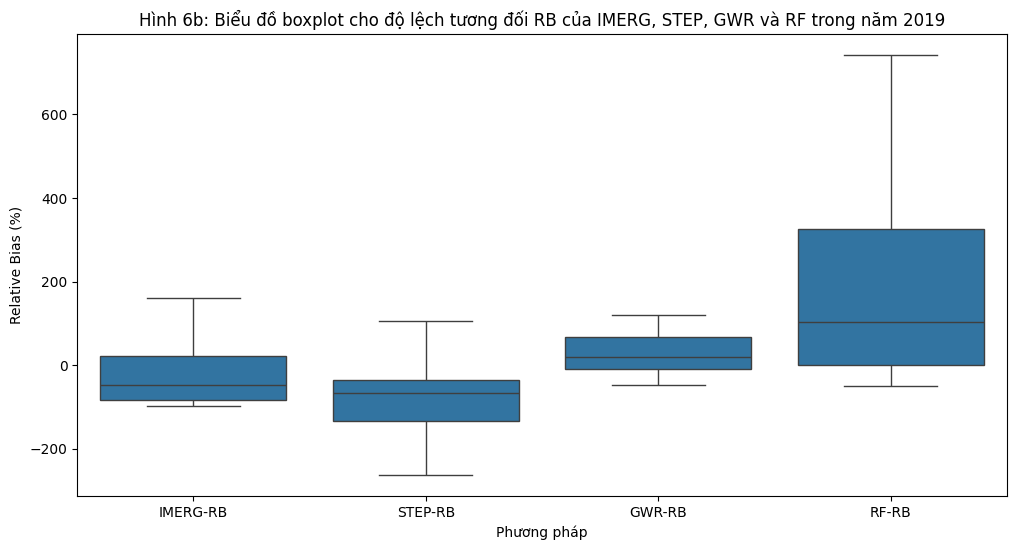

In [71]:
rb_df_long = pd.melt(rb_df, id_vars=['name'], value_vars=['IMERG-RB', 'STEP-RB', 'GWR-RB', 'RF-RB'],
                     var_name='Product', value_name='Relative Bias')

# Vẽ biểu đồ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Relative Bias', data=rb_df_long, showfliers=False)
plt.title('Hình 6b: Biểu đồ boxplot cho độ lệch tương đối RB của IMERG, STEP, GWR và RF trong năm 2019')
plt.xlabel('Phương pháp')
plt.ylabel('Relative Bias (%)')
plt.show()

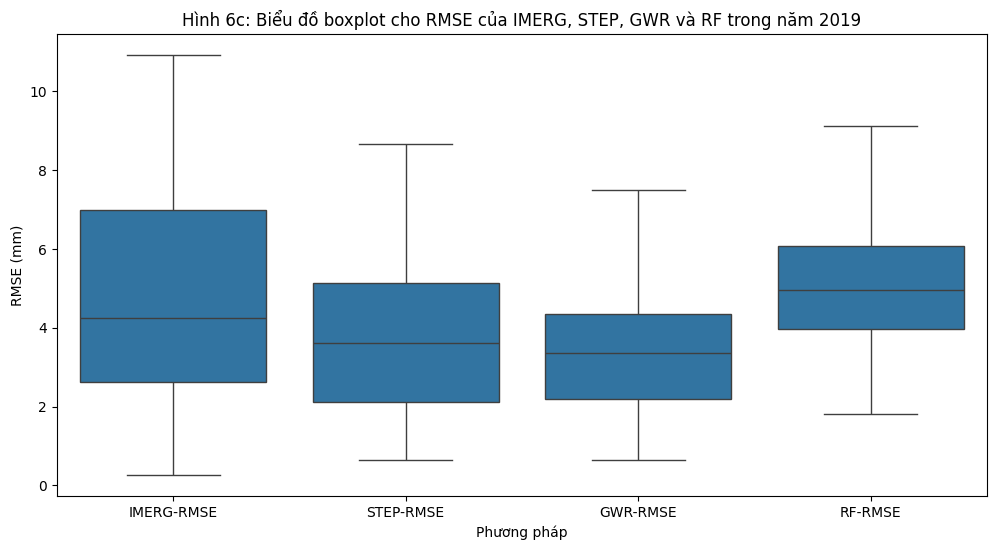

In [72]:
rmse_df_long = pd.melt(rmse_df, id_vars=['name'], value_vars=['IMERG-RMSE', 'STEP-RMSE', 'GWR-RMSE', 'RF-RMSE'],
                       var_name='Product', value_name='RMSE')

# Vẽ biểu đồ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='RMSE', data=rmse_df_long, showfliers=False)
plt.title('Hình 6c: Biểu đồ boxplot cho RMSE của IMERG, STEP, GWR và RF trong năm 2019')
plt.xlabel('Phương pháp')
plt.ylabel('RMSE (mm)')
plt.show()

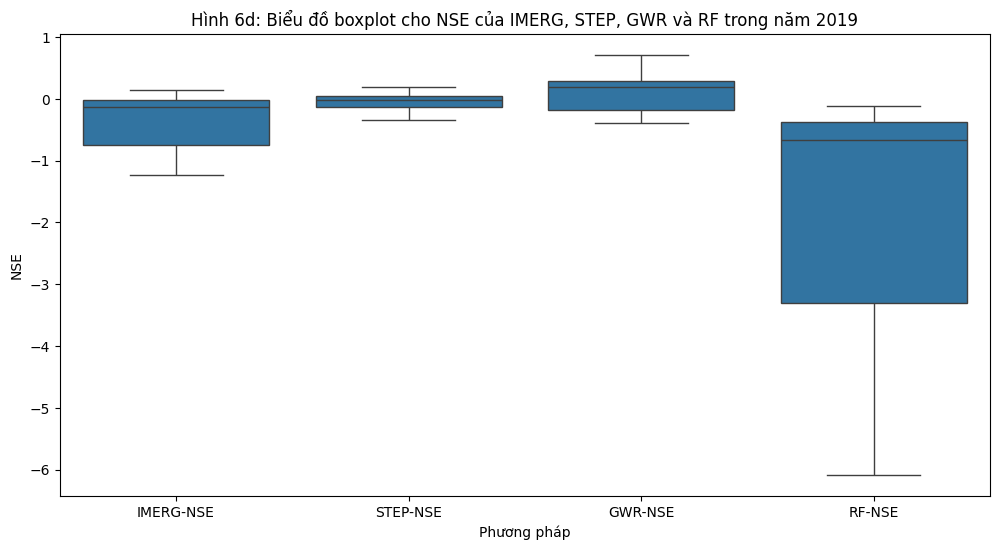

In [73]:
nse_df_long = pd.melt(nse_df, id_vars=['name'], value_vars=['IMERG-NSE', 'STEP-NSE', 'GWR-NSE', 'RF-NSE'],
                      var_name='Product', value_name='NSE')

# Vẽ biểu đồ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='NSE', data=nse_df_long, showfliers=False)
plt.title('Hình 6d: Biểu đồ boxplot cho NSE của IMERG, STEP, GWR và RF trong năm 2019')
plt.xlabel('Phương pháp')
plt.ylabel('NSE')
plt.show()

##Evaluation at Different Time Scales

##Phân tích tác động độ cao

In [13]:
new_df = df_combined.copy()


###Thống kê giá trị của cột DEM

In [15]:
# Tạo numpy array từ cột 'DEM'
dem_array = new_df['DEM'].values

# In ra numpy array
print(dem_array)

unique_values = np.unique(dem_array)
sorted_unique_values = np.sort(unique_values)

print("Các giá trị riêng biệt đã sắp xếp từ thấp đến cao:")
print(sorted_unique_values)

[350 162 260 ...   9 258 164]
Các giá trị riêng biệt đã sắp xếp từ thấp đến cao:
[    0     1     2 ...  2125  2166 32767]


In [16]:
# Lọc và cập nhật giá trị trong cột 'DEM'
new_df.loc[new_df['DEM'] == 32767, 'DEM'] = 0

# In ra DataFrame sau khi đã được cập nhật
print(new_df)

                 name  Row  Column  AWS     Imerg  DEM      STEP       GWR  \
0      20190401000000   16     109  0.8  0.000000  350  1.904419  1.603473   
1      20190401000000   83      69  0.0  0.000000  162 -0.271116  0.000000   
2      20190401000000   82      18  0.0  0.000000  260 -0.262341  0.000000   
3      20190401000000    7     173  0.0  0.000000    0 -0.050783  0.039026   
4      20190401000000   77     235  0.0  0.000000    0  0.238996  0.000000   
...               ...  ...     ...  ...       ...  ...       ...       ...   
39995  20191031230000   20     103  0.2  0.000000  357  1.473952  1.378766   
39996  20191031230000   20     135  1.9  3.327910    9  2.758788  3.279509   
39997  20191031230000   21     129  0.2  2.202812    9  2.336991  3.266569   
39998  20191031230000   67     121  1.6  3.217461  258  4.274359  0.599934   
39999  20191031230000   82      59  0.0  0.208975  164  0.738242  0.000000   

             RF  
0      0.066000  
1      0.884467  
2      0.

In [17]:
# Tạo numpy array từ cột 'DEM'
dem_array = new_df['DEM'].values

# In ra numpy array
print(dem_array)

[350 162 260 ...   9 258 164]


In [18]:
import numpy as np

unique_values = np.unique(dem_array)
sorted_unique_values = np.sort(unique_values)

print("Các giá trị riêng biệt đã sắp xếp từ thấp đến cao:")
print(sorted_unique_values)

Các giá trị riêng biệt đã sắp xếp từ thấp đến cao:
[   0    1    2 ... 2098 2125 2166]


###Tách thành các dataframe dựa trên độ cao của cột DEM

In [47]:
# Tạo DataFrame df_500 chứa các dòng có giá trị cột DEM < 500
df_500 = new_df[new_df['DEM'] < 500]

# Tạo DataFrame df_500to1000 chứa các dòng có giá trị cột DEM >= 500 và < 1000
df_500to1000 = new_df[(new_df['DEM'] >= 500) & (new_df['DEM'] < 1000)]

# Tạo DataFrame df_1000to1500 chứa các dòng có giá trị cột DEM >= 1000 và < 1500
df_1000to1500 = new_df[(new_df['DEM'] >= 1000) & (new_df['DEM'] < 1500)]

# Tạo DataFrame df_1500to2000 chứa các dòng có giá trị cột DEM >= 1500 và < 2000
df_1500to2000 = new_df[(new_df['DEM'] >= 1500) & (new_df['DEM'] < 2000)]

# Tạo DataFrame df_2000 chứa các dòng có giá trị cột DEM > 2000
df_2000 = new_df[new_df['DEM'] > 2000]

df_500 = df_500[df_500['AWS'] > 0]
df_500to1000 = df_500to1000[df_500to1000['AWS'] > 0]
df_1000to1500 = df_1000to1500[df_1000to1500['AWS'] > 0]
df_1500to2000 = df_1500to2000[df_1500to2000['AWS'] > 0]
df_2000 = df_2000[df_2000['AWS'] > 0]

# In ra ba DataFrame mới
print("DataFrame df_500:")
print(df_500)
print("\nDataFrame df_500to1000:")
print(df_500to1000)
print("\nDataFrame df_1000to1500:")
print(df_1000to1500)
print("\nDataFrame df_1500to2000:")
print(df_1500to2000)
print("\nDataFrame df_2000:")
print(df_2000)

DataFrame df_500:
                 name  Row  Column   AWS     Imerg  DEM      STEP       GWR  \
0      20190401000000   16     109   0.8  0.000000  350  1.904419  1.603473   
14     20190401000000   15     115   1.2  0.000000  138  1.904419  1.513003   
15     20190401000000    7     115  19.0  0.237974  104  2.096213  2.664028   
17     20190401000000   30     122   2.8  0.000000   12  1.306302  2.381063   
18     20190401000000   27     118   0.2  0.000000   30  2.264180  2.694275   
...               ...  ...     ...   ...       ...  ...       ...       ...   
39994  20191031230000   19     126   0.4  1.757917   11  2.211935  2.117013   
39995  20191031230000   20     103   0.2  0.000000  357  1.473952  1.378766   
39996  20191031230000   20     135   1.9  3.327910    9  2.758788  3.279509   
39997  20191031230000   21     129   0.2  2.202812    9  2.336991  3.266569   
39998  20191031230000   67     121   1.6  3.217461  258  4.274359  0.599934   

             RF  
0      0.066000

Thống kê số trạm khác nhau ở mỗi độ cao

In [48]:
# Đếm số lượng dòng có giá trị cặp (Row, Column) khác nhau
unique_row_column_count = df_500.drop_duplicates(subset=["Row", "Column"]).shape[0]

print("Số lượng trạm ở độ cao nhỏ hơn 500m:", unique_row_column_count)

Số lượng trạm ở độ cao nhỏ hơn 500m: 283


In [49]:
# Đếm số lượng dòng có giá trị cặp (Row, Column) khác nhau
unique_row_column_count = df_500to1000.drop_duplicates(subset=["Row", "Column"]).shape[0]

print("Số lượng trạm ở độ cao từ 500m đến 1000m:", unique_row_column_count)

Số lượng trạm ở độ cao từ 500m đến 1000m: 21


In [50]:
# Đếm số lượng dòng có giá trị cặp (Row, Column) khác nhau
unique_row_column_count = df_1000to1500.drop_duplicates(subset=["Row", "Column"]).shape[0]

print("Số lượng trạm ở độ cao từ 1000m đến 1500m:", unique_row_column_count)

Số lượng trạm ở độ cao từ 1000m đến 1500m: 7


###Tính bảng giá trị CC, RB, NSE, RMSE theo độ cao

In [52]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_squared_error

# Tính toán các giá trị CC, RB, NSE, RMSE
def calculate_metrics(df):
    metrics = {}
    for column in ['Imerg', 'STEP', 'GWR', 'RF']:
        obs = df['AWS'].values
        pred = df[column].values
        # CC
        cc = np.corrcoef(obs.flatten(), pred.flatten())[0][1]
        # RB: Relative Bias
        rb = np.sum(pred - obs) / np.sum(obs) * 100
        # NSE: Nash-Sutcliffe Efficiency
        nse = 1 - np.sum((pred - obs) ** 2) / np.sum((obs - np.mean(obs)) ** 2)
        # RMSE: Root Mean Squared Error
        rmse = np.sqrt(mean_squared_error(obs, pred))

        metrics[column] = {'CC': round(cc, 2), 'RB': round(rb, 2), 'NSE': round(nse, 2), 'RMSE': round(rmse, 2)}
    return pd.DataFrame.from_dict(metrics).T


# Tạo bảng thống kê cho từng DataFrame
df_500_stats = calculate_metrics(df_500)
df_500to1000_stats = calculate_metrics(df_500to1000)
df_1000to1500_stats = calculate_metrics(df_1000to1500)

# Hiển thị bảng thống kê
print("Bảng thống kê cho trạm có độ cao nhỏ hơn 500m:")
print(df_500_stats)
print("\nBảng thống kê cho trạm có độ cao từ 500 đến 1000m:")
print(df_500to1000_stats)
print("\nBảng thống kê cho trạm có độ cao từ 1000 đến 1500m:")
print(df_1000to1500_stats)


Bảng thống kê cho trạm có độ cao nhỏ hơn 500m:
         CC     RB   NSE  RMSE
Imerg  0.19 -15.51 -0.41  7.88
STEP   0.19 -37.05  0.00  6.61
GWR    0.49  -3.90  0.24  5.79
RF    -0.00 -37.34 -0.27  7.47

Bảng thống kê cho trạm có độ cao từ 500 đến 1000m:
         CC     RB   NSE  RMSE
Imerg  0.26 -38.62 -0.29  4.74
STEP   0.20 -50.36 -0.03  4.24
GWR    0.39 -13.00  0.14  3.86
RF     0.03 -13.57 -0.46  5.04

Bảng thống kê cho trạm có độ cao từ 1000 đến 1500m:
         CC     RB   NSE  RMSE
Imerg  0.27 -40.77 -0.39  4.00
STEP   0.24 -67.13 -0.07  3.51
GWR    0.41 -16.26  0.15  3.13
RF     0.04   0.03 -0.62  4.32
